# Assignment 5

Team Members: Oliver Gullery (95292827), Sam Thorne (83910448), Riddhi Battu (85855856), Kourosh Shahbazi (87286076)

## Short Summary

Our group wanted to examine the potential effects that a country’s emissions could have on the health of its citizens and residents. The control of our emissions is rooted in the environmental pillar of sustainability since increased emissions have been linked with rising global temperatures and habitat destruction (polar ice caps melting, etc). On the other hand, the concept of health and healthcare is rooted in the social pillar of sustainability. Comparing these two aspects will allow us to assess the bearability (cross-section of environmental and social sustainability) of the current emissions rate on health. 

Over the course of this assignment, we will demonstrate which statistical method we applied in order to examine our project idea, the issues we faced and what we did to correct them, and the creation of an appropriate visualization related to the data at hand.

In [1]:
!pip install oracledb

In [2]:
import oracledb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user="ora_gullery1", password="a95292827", dsn=dsn)
cur = connection.cursor()

### Fetch needed data for analysis

In [4]:
sql ="""SELECT
    C.Name AS Country,
    E.CarbonDioxideEmissions,
    E.NitrousOxideEmissions,
    E.TotalGHGEmissions,
    E.MethaneEmissions,
    H.CompletenessOfBirthRegistration,
    H.CompletenessOfDeathRegistration,
    EX.PercentOfGDP,
    EX.PercentOfPublicFunded,
    HR.MaleTobaccoUse,
    HR.FemaleTobaccoUse,
    HR.IncidenceOfTuberculosis,
    HR.PrevalenceOfDiabetes,
    P.Injuries,
    P.NonCommunicableDiseases,
    P.CommunicableDiseases
FROM Country C
JOIN EmissionData E ON C.CountryID = E.CountryID
JOIN HealthSystem H ON C.CountryID = H.CountryID
JOIN HealthExpenditure EX ON H.HealthSystemID = EX.HealthSystemID
JOIN HealthRiskFactors HR ON C.CountryID = HR.CountryID
JOIN PopulationCauseOfDeath P ON HR.HealthRiskFactorID = P.HealthRiskFactorID

"""
cur.execute(sql)

column_names = [
    "Country",
    "CarbonDioxideEmissions",
    "NitrousOxideEmissions",
    "TotalGHGEmissions",
    "MethaneEmissions",
    "CompletenessOfBirthRegistration",
    "CompletenessOfDeathRegistration",
    "PercentOfGDP",
    "PercentOfPublicFunded",
    "MaleTobaccoUse",
    "FemaleTobaccoUse",
    "IncidenceOfTuberculosis",
    "PrevalenceOfDiabetes",
    "Injuries",
    "NonCommunicableDiseases",
    "CommunicableDiseases"
]

row_list = []
for row in cur:
    row_list.append(row)
    
data = pd.DataFrame(row_list, columns=column_names)  
data


,Country,CarbonDioxideEmissions,NitrousOxideEmissions,TotalGHGEmissions,MethaneEmissions,CompletenessOfBirthRegistration,CompletenessOfDeathRegistration,PercentOfGDP,PercentOfPublicFunded,MaleTobaccoUse,FemaleTobaccoUse,IncidenceOfTuberculosis,PrevalenceOfDiabetes,Injuries,NonCommunicableDiseases,CommunicableDiseases
0,Afghanistan,NaN,NaN,NaN,NaN,42.0,NaN,10.0,5.0,NaN,NaN,189.0,9.0,20.0,44.0,36.0
1,Albania,NaN,NaN,NaN,NaN,98.0,53.0,7.0,41.0,51.0,7.0,18.0,9.0,4.0,93.0,3.0
2,Algeria,NaN,NaN,NaN,NaN,100.0,NaN,7.0,68.0,30.0,1.0,69.0,7.0,10.0,76.0,15.0
3,American Samoa,NaN,24.0,59.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Andorra,462.0,0.0,NaN,NaN,100.0,80.0,10.0,49.0,38.0,29.0,3.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Virgin Islands (U.S.),NaN,13.0,62.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
209,West Bank and Gaza,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN,NaN
210,"Yemen, Rep.",NaN,NaN,NaN,NaN,31.0,NaN,6.0,10.0,29.0,8.0,48.0,5.0,15.0,57.0,29.0
211,Zambia,NaN,NaN,NaN,NaN,11.0,NaN,5.0,38.0,25.0,3.0,346.0,5.0,10.0,29.0,61.0


In [5]:
data_filled = data.fillna(0)

Statsmodels: Allows for more statistical insight into the model. You can fit a model using OLS (Ordinary Least Squares) and then review the summary for insights.

### Communicable Diseases

### Regression Analysis Summary

#### Purpose
This analysis aims to understand how different types of emissions affect the prevalence of communicable diseases across countries.

#### Model Overview
- **Dependent Variable**: Prevalence of Communicable Diseases
- **Independent Variables**: Carbon Dioxide Emissions, Nitrous Oxide Emissions, Total Greenhouse Gas Emissions, Methane Emissions

#### Key Findings
- **R-squared (R²) Value**: 0.014. This indicates that the model explains only 1.4% of the variance in the prevalence of communicable diseases. It suggests that the independent variables provide very little information about the variability of the dependent variable.
- **Adjusted R-squared**: -0.005. The adjustment for the number of predictors in the model does not improve the explanatory power, indicating that the model may not be the best fit for this particular analysis.
- **F-statistic**: The F-statistic value of 0.7155 with a p-value of 0.582 suggests that there is not enough statistical evidence to conclude that the model is significantly different from an intercept-only model. In simpler terms, the emissions types as predictors do not significantly predict the prevalence of communicable diseases.
- **Coefficients**: None of the emissions types show a statistically significant impact on the prevalence of communicable diseases, as indicated by their p-values (all above 0.05). 

#### Interpretation of Coefficients
- **Carbon Dioxide Emissions**: For every unit increase in carbon dioxide emissions, the prevalence of communicable diseases increases by 0.0085 units, although this is not statistically significant (p-value: 0.267).
- **Nitrous Oxide Emissions**: A unit increase in nitrous oxide emissions is associated with a 0.0093 unit increase in the prevalence of communicable diseases, but this relationship is also not statistically significant (p-value: 0.238).
- **Total Greenhouse Gas Emissions and Methane Emissions**: Both show negative coefficients, suggesting a decrease in the prevalence of communicable diseases with increased emissions. However, these relationships are not statistically significant.

#### Statistical Tests and Validity
- **Omnibus test**: Indicates the residuals' skewness and kurtosis significantly deviate from that expected under a normal distribution, challenging the model's assumptions.
- **Durbin-Watson statistic**: With a value of 1.717, it suggests there is no strong evidence of autocorrelation in the residuals.

### Conclusion
The analysis indicates that there is no significant statistical relationship between the types of emissions studied and the prevalence of communicable diseases based on the current model. It is clear that there may be some issues in the data we presented into our regression model, which led our team to go back to the drawing board and discuss how we could improve our analysis (see below)

In [6]:
X = data_filled[['CarbonDioxideEmissions', 'NitrousOxideEmissions', 'TotalGHGEmissions', 'MethaneEmissions']]
Y = data_filled['CommunicableDiseases']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     CommunicableDiseases   R-squared:                       0.014
Model:                              OLS   Adj. R-squared:                 -0.005
Method:                   Least Squares   F-statistic:                    0.7155
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):              0.582
Time:                          03:08:34   Log-Likelihood:                -942.38
No. Observations:                   213   AIC:                             1895.
Df Residuals:                       208   BIC:                             1912.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

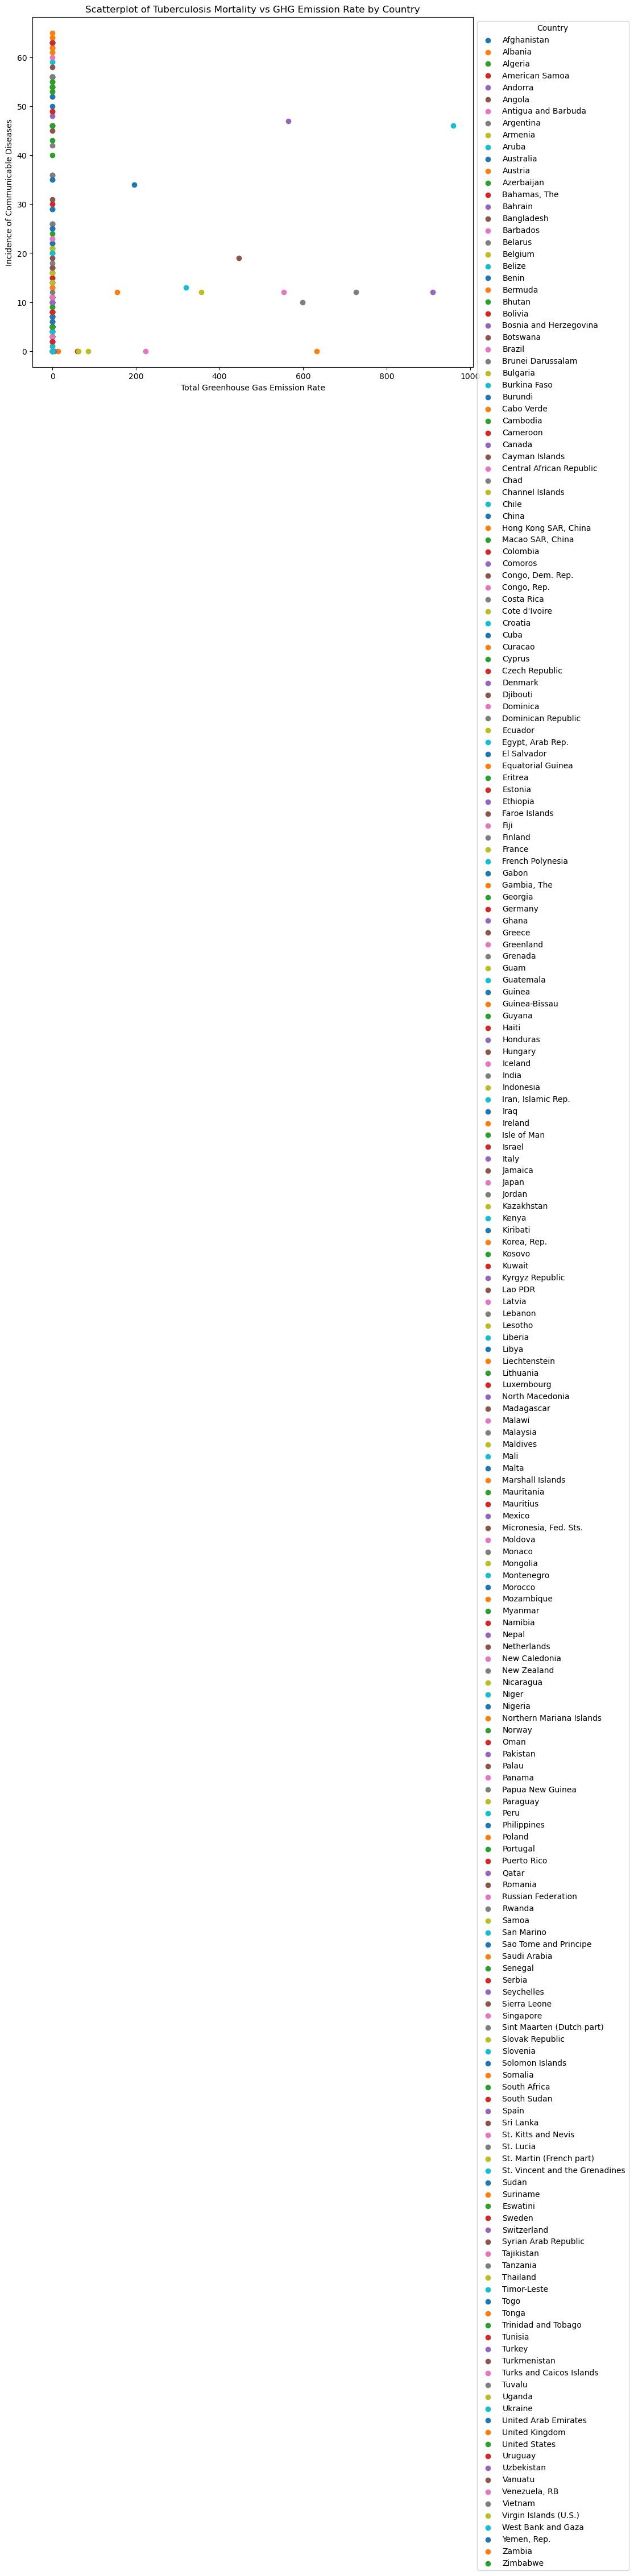

In [7]:
# Plotting
plt.figure(figsize=(10, 8))
for i in range(len(data_filled)):
    plt.scatter(data_filled['TotalGHGEmissions'][i], data_filled['CommunicableDiseases'][i], label=data_filled['Country'][i])

plt.xlabel('Total Greenhouse Gas Emission Rate')
plt.ylabel('Incidence of Communicable Diseases')
plt.title('Scatterplot of Tuberculosis Mortality vs GHG Emission Rate by Country')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title="Country")

plt.show()

## Issues with our OLS and attempts to resolve

As emphasized in our regression analysis, there does not seem to be enough evidence to conclude any statistically significant relationship between the different types of emmissions and the increased prevelance of CommunicableDiseases

Our group idendified the way we handled NaN values to be a contributing factor behind why our low R-squared value and other indications of poor statistical significance. In the analysis above we decided to make all NaN values = 0. This likely significantly scewed our regression results. On top of this, it also resulted in the vast majority of countries being placed at the 0 value of the X-axis of scatterplot.

As a result, our group decided to remove all rows that contained NaN values. We sound found out that a lot of our dataset had NaN values (i.e. only a few countries reported all the different emission types), so as a result we changed our OLS analysis to only include the emission types that would yield the most amount of countries (NitrousOxideEmissions and MethaneEmissions). 

In [8]:
selected_columns = ['Country', 'CommunicableDiseases', 'NitrousOxideEmissions', 'MethaneEmissions']
data_for_analysis = data[selected_columns]

data_for_analysis

,Country,CommunicableDiseases,NitrousOxideEmissions,MethaneEmissions
0,Afghanistan,36.0,NaN,NaN
1,Albania,3.0,NaN,NaN
2,Algeria,15.0,NaN,NaN
3,American Samoa,NaN,24.0,13.0
4,Andorra,NaN,0.0,NaN
...,...,...,...,...
208,Virgin Islands (U.S.),NaN,13.0,47.0
209,West Bank and Gaza,NaN,NaN,NaN
210,"Yemen, Rep.",29.0,NaN,NaN
211,Zambia,61.0,NaN,NaN


In [9]:
data_for_analysis_filtered = data_for_analysis.dropna()

In [10]:
data_for_analysis_filtered

,Country,CommunicableDiseases,NitrousOxideEmissions,MethaneEmissions
6,Antigua and Barbuda,12.0,26.0,43.0
13,"Bahamas, The",17.0,131.0,227.0
16,Barbados,13.0,59.0,109.0
19,Belize,19.0,200.0,228.0
31,Cabo Verde,20.0,81.0,151.0
44,Comoros,47.0,59.0,284.0
52,Cyprus,4.0,315.0,642.0
55,Djibouti,45.0,257.0,634.0
66,Fiji,10.0,344.0,715.0
77,Grenada,12.0,26.0,37.0


### Impact of Greenhouse Gas Emissions on Communicable Diseases: An OLS Regression Analysis

As was done previously, our group employed an Ordinary Least Squares (OLS) regression analysis to examine the relationship between prevalence of communicable diseases with emissions of nitrous oxide and methane.

#### Model Insights:

- **Dependent Variable:** Prevalence of communicable diseases.
- **Independent Variables:** Emissions of nitrous oxide and methane.
- **R-squared:** 0.324, indicating that approximately 32.4% of the variance in communicable disease rates can be explained by our model.
- **Adjusted R-squared:** 0.265, which adjusts the R-squared value for the number of predictors in the model, suggesting a good fit.
- **F-statistic (5.510) and Prob (F-statistic) (0.0111):** This indicates that the model is statistically significant, as the probability of observing these data under the null hypothesis (that there is no relationship between the emissions and disease rates) is just over 1%.

#### Coefficients:

- **Nitrous Oxide Emissions:** For every one-unit increase in nitrous oxide emissions, there is an estimated decrease of 0.1204 in the rate of communicable diseases, significant at the 0.007 level.
- **Methane Emissions:** Conversely, each one-unit increase in methane emissions is associated with an increase of 0.0645 in the rate of communicable diseases, significant at the 0.003 level.

#### Conclusion:

By completing our changes and removing the NaN rows, our analysis reveals a nuanced relationship between greenhouse gas emissions and the prevalence of communicable diseases, which a much improved R-squared value, among other insights. Specifically, we find that while nitrous oxide emissions are inversely related to disease rates, methane emissions appear to increase them. This suggests that different types of emissions may have diverse impacts on public health, underlining the importance of targeted environmental policies.

#### Further Considerations:

- **Durbin-Watson statistic (2.533):** This value suggests that there is no significant autocorrelation in the residuals of our model, indicating that our model specifications are appropriate.
- **Limitations:** The study's scope is limited by the small sample size and the specific types of emissions analyzed. Future research should consider a broader range of pollutants and a larger dataset to validate these findings.

This study contributes to our understanding of how environmental sustainability intersects with public health, emphasizing the need for comprehensive strategies to mitigate the adverse health impacts of greenhouse gas emissions.

The changes we made also greatly improved the readability and interpretability of our visualization (shown below)

In [11]:
X = data_for_analysis_filtered[['NitrousOxideEmissions', 'MethaneEmissions']]
Y = data_for_analysis_filtered['CommunicableDiseases']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     CommunicableDiseases   R-squared:                       0.324
Model:                              OLS   Adj. R-squared:                  0.265
Method:                   Least Squares   F-statistic:                     5.510
Date:                  Sat, 23 Mar 2024   Prob (F-statistic):             0.0111
Time:                          03:08:41   Log-Likelihood:                -97.736
No. Observations:                    26   AIC:                             201.5
Df Residuals:                        23   BIC:                             205.2
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [12]:
selected_columns_plot = ['Country', 'NitrousOxideEmissions', 'CommunicableDiseases']
data_for_plot = data[selected_columns_plot]
data_for_plot

,Country,NitrousOxideEmissions,CommunicableDiseases
0,Afghanistan,NaN,36.0
1,Albania,NaN,3.0
2,Algeria,NaN,15.0
3,American Samoa,24.0,NaN
4,Andorra,0.0,NaN
...,...,...,...
208,Virgin Islands (U.S.),13.0,NaN
209,West Bank and Gaza,NaN,NaN
210,"Yemen, Rep.",NaN,29.0
211,Zambia,NaN,61.0


In [13]:
data_for_plot_clean = data_for_plot.dropna()
data_for_plot_clean.head()

,Country,NitrousOxideEmissions,CommunicableDiseases
6,Antigua and Barbuda,26.0,12.0
13,"Bahamas, The",131.0,17.0
14,Bahrain,131.0,7.0
16,Barbados,59.0,13.0
19,Belize,200.0,19.0


/tmp/ipykernel_504/280598953.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the layout to make room for the legend


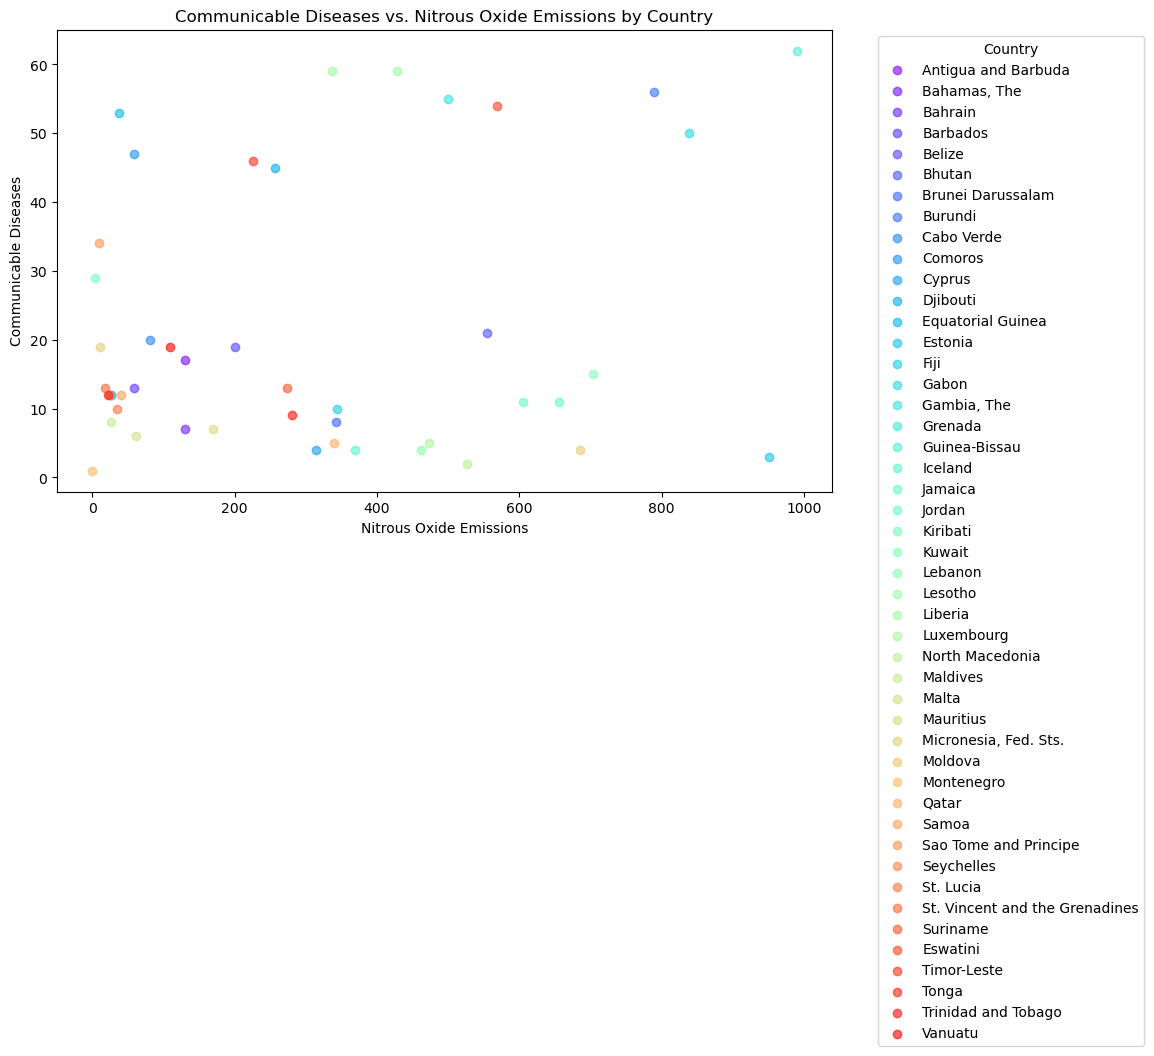

In [14]:
# Map countries to colors
countries = data_for_plot_clean['Country'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))
color_map = dict(zip(countries, colors))

# Plotting
plt.figure(figsize=(10, 6))
for country in countries:
    # Filter data for one country at a time
    data_subset = data_for_plot_clean[data_for_plot_clean['Country'] == country]
    
    plt.scatter(data_subset['NitrousOxideEmissions'], data_subset['CommunicableDiseases'], color=color_map[country], label=country, alpha=0.6)

plt.xlabel('Nitrous Oxide Emissions')
plt.ylabel('Communicable Diseases')
plt.title('Communicable Diseases vs. Nitrous Oxide Emissions by Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()